In [ ]:
import pandas as pd

# 파일 경로에 맞게 수정
file_path = r'C:\Users\jueun\Desktop\Uni\기후빅데이터\CLIMAX\train_subway_2021.csv'

df = pd.read_csv(file_path, encoding='utf-8')  # 한국어 윈도우 기본 인코딩 시도
# 상위 5행 출력
print(df.head())


UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 108: illegal multibyte sequence

In [11]:
# 데이터 구조 및 타입 확인
print(df.info())

# 기본 통계 요약
print(df.describe())

# 결측치 확인
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452143 entries, 0 to 5452142
Data columns (total 16 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   train_subway21.tm              int64  
 2   train_subway21.line            int64  
 3   train_subway21.station_number  int64  
 4   train_subway21.station_name    object 
 5   train_subway21.direction       object 
 6   train_subway21.stn             int64  
 7   train_subway21.ta              float64
 8   train_subway21.wd              float64
 9   train_subway21.ws              float64
 10  train_subway21.rn_day          float64
 11  train_subway21.rn_hr1          float64
 12  train_subway21.hm              float64
 13  train_subway21.si              float64
 14  train_subway21.ta_chi          float64
 15  train_subway21.congestion      int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 665.5+ MB
None
         Unnamed: 0  train

In [12]:
# 'train_subway21.tm' 컬럼을 datetime으로 변환
df['datetime'] = pd.to_datetime(df['train_subway21.tm'], format='%Y%m%d%H')

# 연, 월, 일, 시간, 요일 파생변수 생성
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday  # 월요일=0, 일요일=6

print(df[['datetime', 'year', 'month', 'day', 'hour', 'weekday']].head())


             datetime  year  month  day  hour  weekday
0 2021-01-01 00:00:00  2021      1    1     0        4
1 2021-01-01 01:00:00  2021      1    1     1        4
2 2021-01-01 05:00:00  2021      1    1     5        4
3 2021-01-01 06:00:00  2021      1    1     6        4
4 2021-01-01 07:00:00  2021      1    1     7        4


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예: 기온과 혼잡도 관계 시각화
plt.figure(figsize=(7,5))
sns.regplot(x='train_subway21.ta', y='train_subway21.congestion', data=df, scatter_kws={'alpha':0.5})
plt.title('기온과 혼잡도 관계')
plt.xlabel('기온 (ta)')
plt.ylabel('혼잡도 (congestion)')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000024FD3A1DC60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

c:\Users\COEL_03\anaconda3\envs\climate\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\COEL_03\anaconda3\envs\climate\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\COEL_03\anaconda3\envs\climate\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\COEL_03\anaconda3\envs\climate\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\COEL_03\anaconda3\envs\climate\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLA

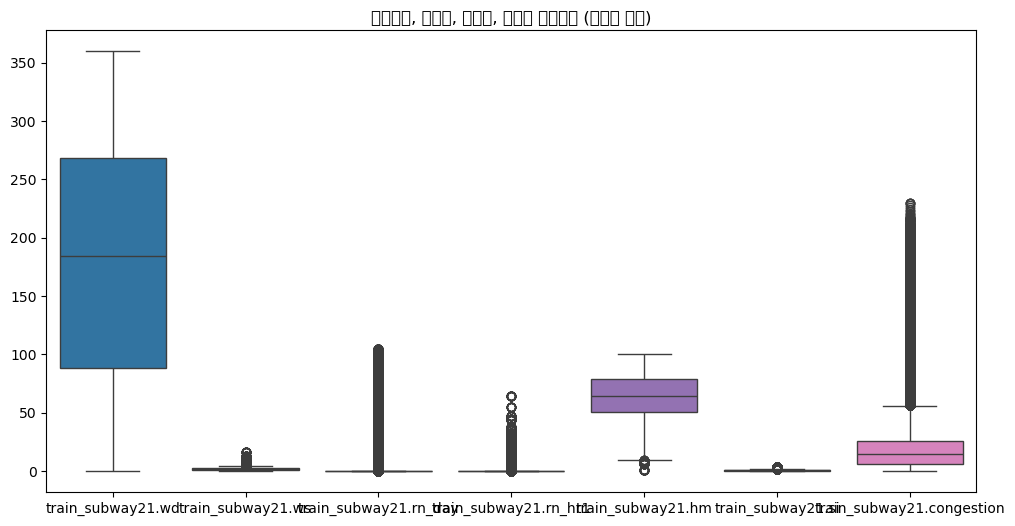

In [5]:
import numpy as np

# 풍향, 풍속, 일, 시간 강수량, 상대습도, 일사량, 혼잡도는 음수값이 나올 수 없으므로 음수값을 이상치로 간주
columns_to_check = ['train_subway21.wd','train_subway21.ws','train_subway21.rn_day', 'train_subway21.rn_hr1',
                    'train_subway21.hm','train_subway21.si', 'train_subway21.congestion',]

# 음수 값을 NaN으로 처리하는 함수
def handle_negative_values(df, columns):
    for col in columns:
        df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)  # 음수 값은 NaN으로 처리
    return df

# 음수 값 처리
df = handle_negative_values(df, columns_to_check)

# 결측치 처리 (이후 결측치를 평균값으로 대체)
df['train_subway21.wd'] = df['train_subway21.wd'].fillna(df['train_subway21.wd'].mean())
df['train_subway21.ws'] = df['train_subway21.ws'].fillna(df['train_subway21.ws'].mean())
df['train_subway21.rn_day'] = df['train_subway21.rn_day'].fillna(df['train_subway21.rn_day'].mean())
df['train_subway21.rn_hr1'] = df['train_subway21.rn_hr1'].fillna(df['train_subway21.rn_hr1'].mean())
df['train_subway21.hm'] = df['train_subway21.hm'].fillna(df['train_subway21.hm'].mean())
df['train_subway21.si'] = df['train_subway21.si'].fillna(df['train_subway21.si'].mean())
df['train_subway21.congestion'] = df['train_subway21.congestion'].fillna(df['train_subway21.congestion'].mean())


# 결측치 처리 후 데이터 확인

# 상대습도, 일사량, 강수량, 혼잡도 변수들의 박스플롯 시각화
plt.figure(figsize=(12, 6))

# 박스플롯 생성
sns.boxplot(data=df[['train_subway21.wd','train_subway21.ws','train_subway21.rn_day', 'train_subway21.rn_hr1',
                    'train_subway21.hm','train_subway21.si', 'train_subway21.congestion']])

plt.title('상대습도, 일사량, 혼잡도, 강수량 박스플롯 (이상치 확인)')
plt.show()

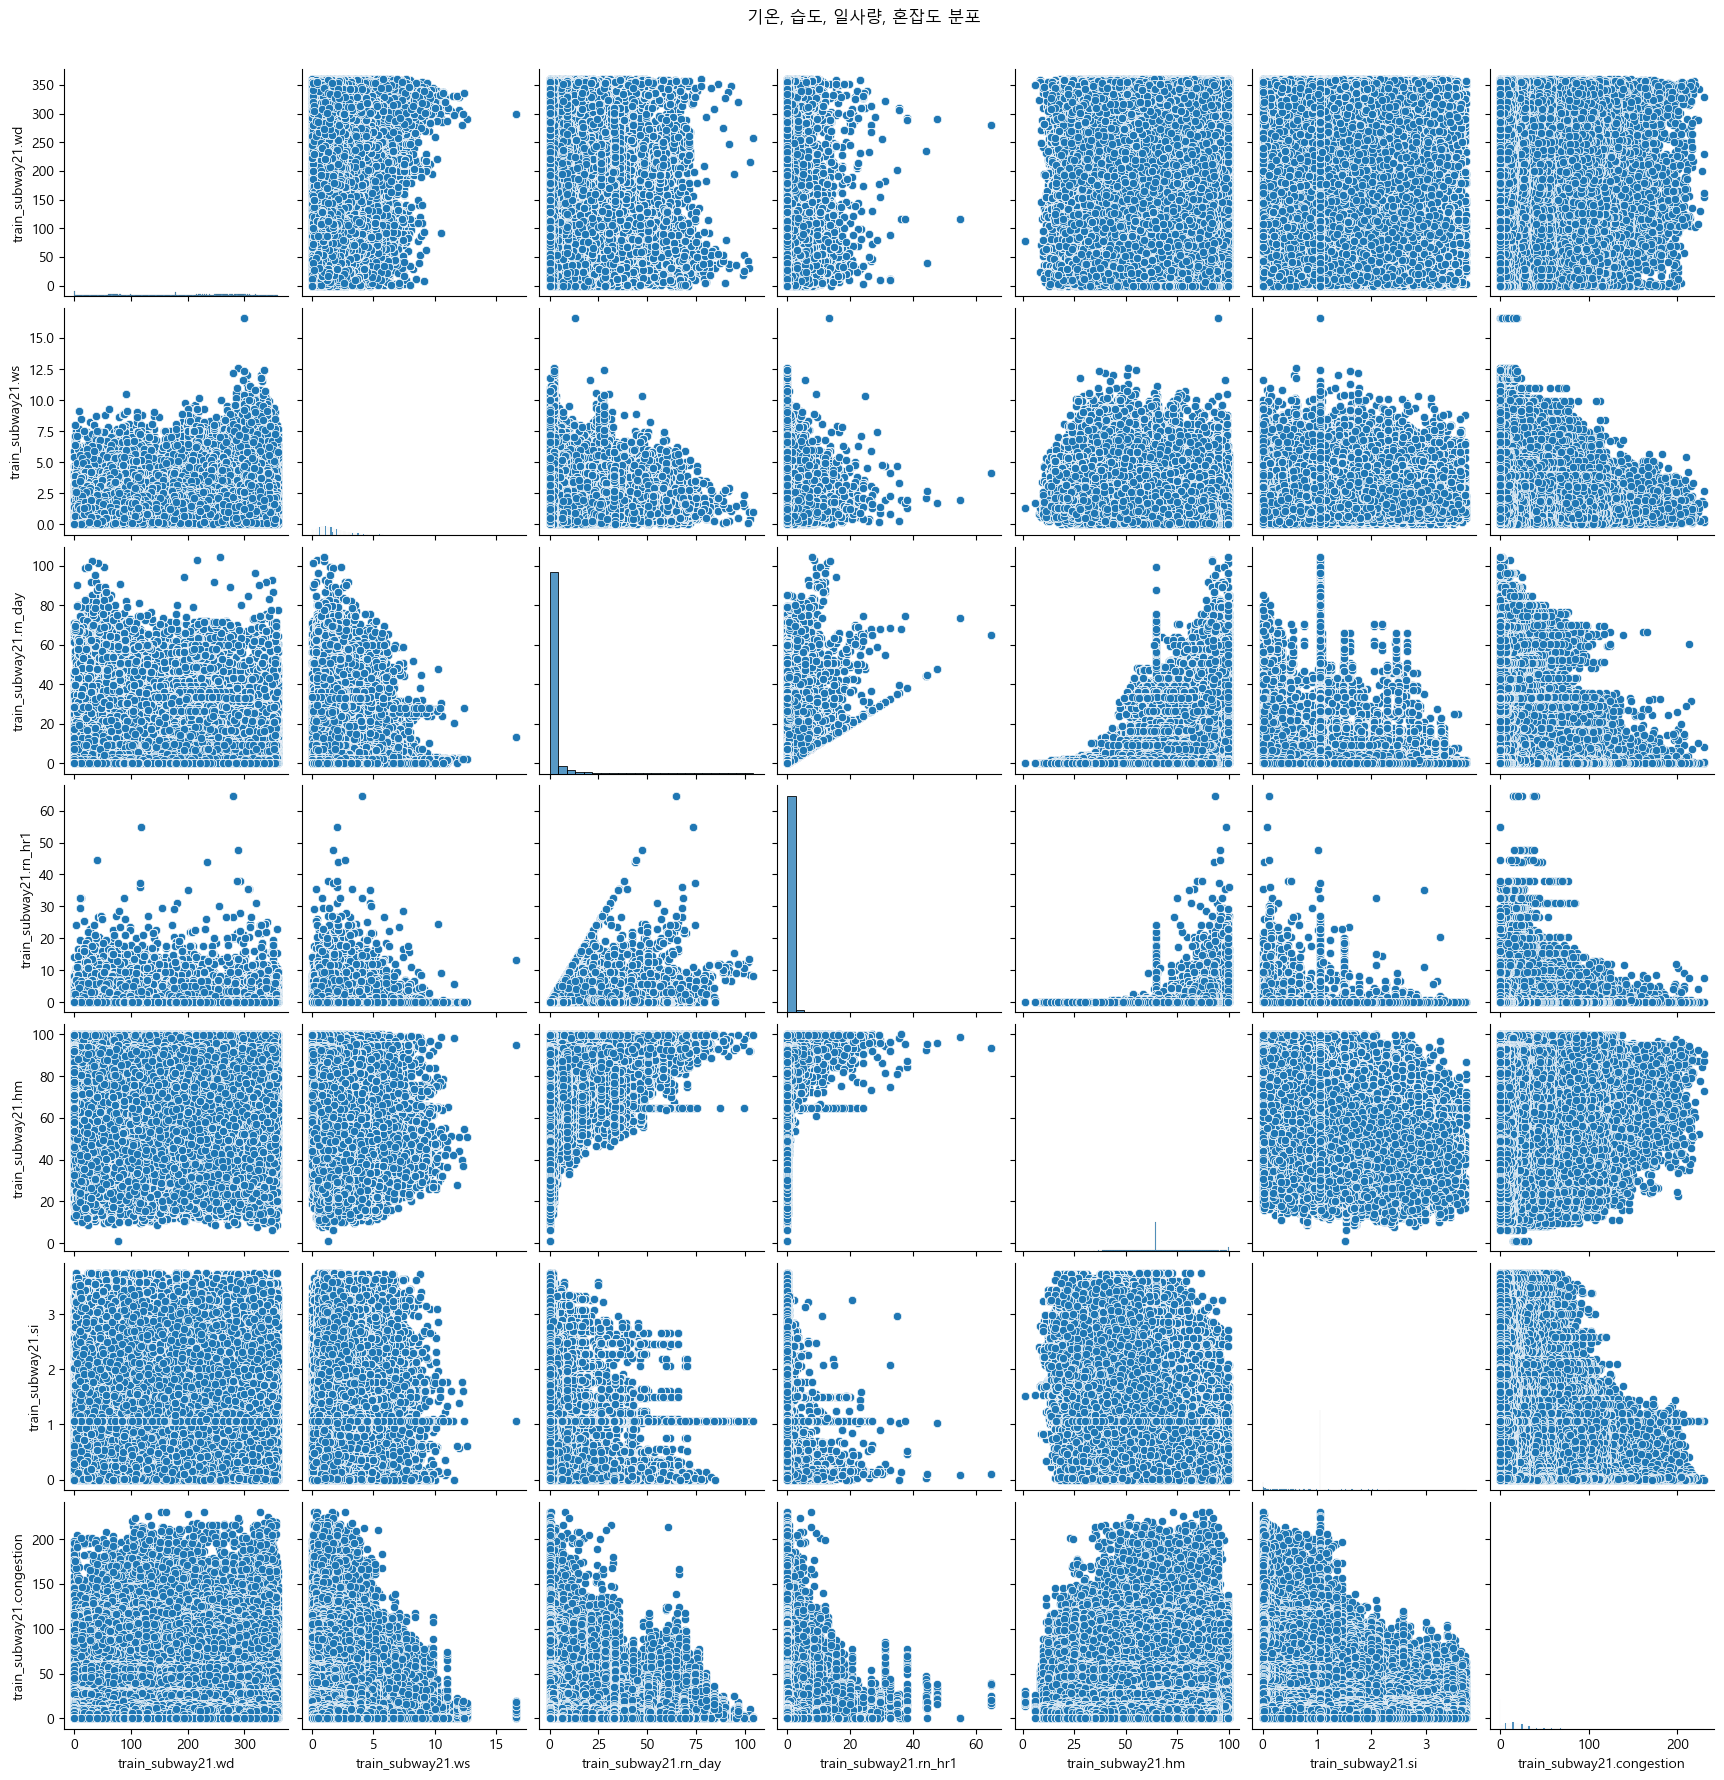

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['train_subway21.wd','train_subway21.ws','train_subway21.rn_day', 'train_subway21.rn_hr1',
                    'train_subway21.hm','train_subway21.si', 'train_subway21.congestion']])
plt.suptitle("기온, 습도, 일사량, 혼잡도 분포", y=1.02)
plt.show()


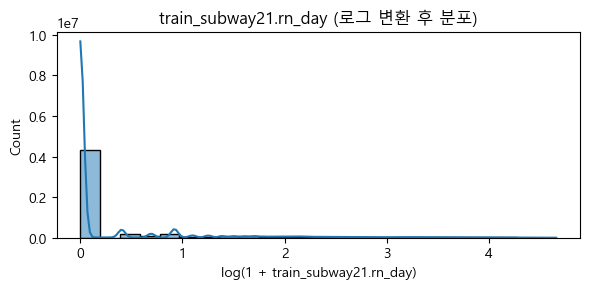

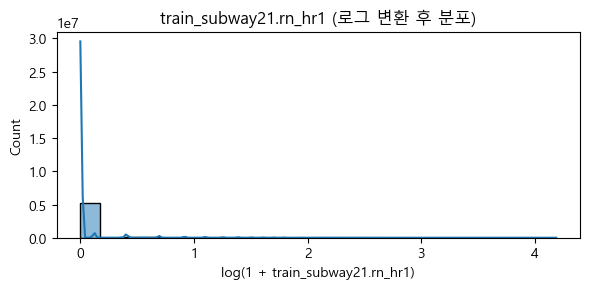

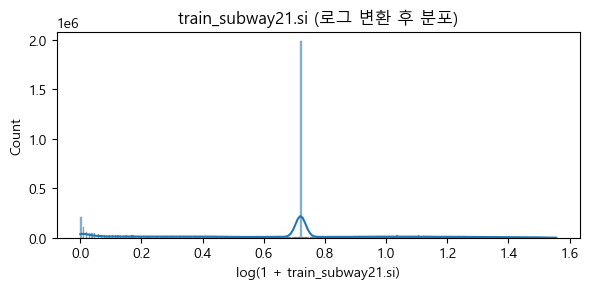

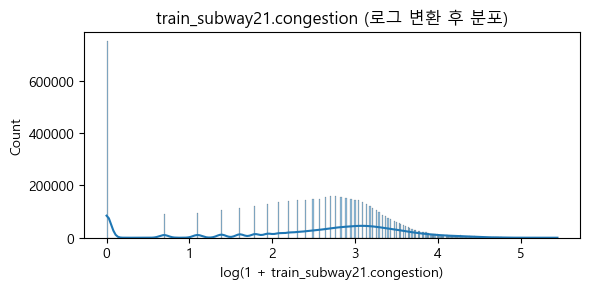

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 로그 변환 대상 변수
log_columns = ['train_subway21.rn_day', 'train_subway21.rn_hr1', 'train_subway21.si', 'train_subway21.congestion']

for col in log_columns:
    df[f'{col}_log'] = np.log1p(df[col])  # log(1 + x)

    plt.figure(figsize=(6, 3))
    sns.histplot(df[f'{col}_log'], kde=True)
    plt.title(f"{col} (로그 변환 후 분포)")
    plt.xlabel(f"log(1 + {col})")
    plt.tight_layout()
    plt.show()


In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    # 윈도우에서 기본 폰트 지정 (맑은 고딕)
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    # macOS일 경우 (예: AppleGothic)
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    # 리눅스 등은 적절한 한글 폰트 경로 지정 필요
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    fontprop = fm.FontProperties(fname=font_path).get_name()
    plt.rcParams['font.family'] = fontprop

# 음수 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [14]:

### 2. 데이터 전처리


# 타임스탬프를 날짜/시간 형식으로 변환 (tm 필드가 Unix timestamp라고 가정)
# 실제 데이터 형식에 맞게 조정 필요
df['datetime'] = pd.to_datetime(df['train_subway21.tm'], format='%Y%m%d%H')
df['date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek  # 0: 월요일, 6: 일요일
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)  # 주말 여부

# 계절 추가
df['season'] = df['month'].apply(lambda x: 1 if x in [3, 4, 5] else 
                                          (2 if x in [6, 7, 8] else 
                                           (3 if x in [9, 10, 11] else 4)))
# 1: 봄, 2: 여름, 3: 가을, 4: 겨울

# 시간대 그룹화 (출퇴근 시간 등)
df['time_category'] = pd.cut(df['hour'], 
                            bins=[-1, 6, 9, 16, 19, 23],
                            labels=['심야', '출근', '낮', '퇴근', '밤'])


C:\Users\COEL_03\AppData\Local\Temp\ipykernel_25596\4097146712.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='train_subway21.congestion', data=df, ci=None)


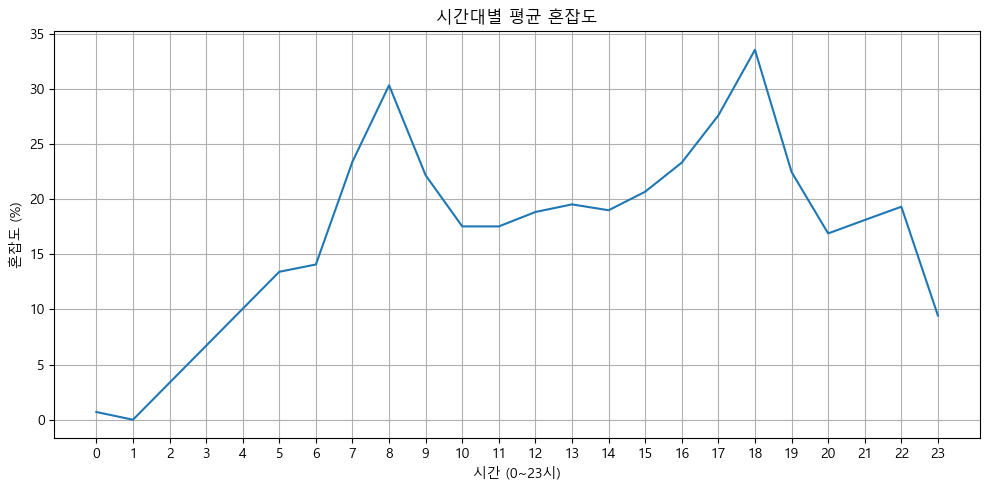

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='train_subway21.congestion', data=df, ci=None)
plt.title('시간대별 평균 혼잡도')
plt.xlabel('시간 (0~23시)')
plt.ylabel('혼잡도 (%)')
plt.grid(True)
plt.xticks(range(0, 24, 1))
plt.tight_layout()
plt.show()


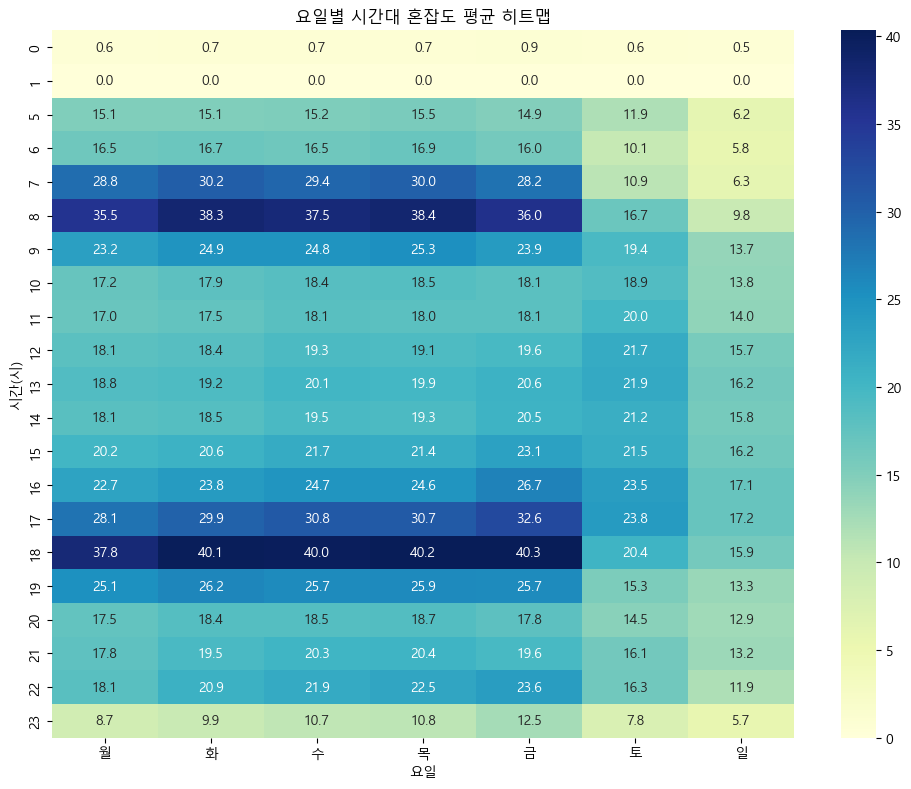

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 요일/시간 파생 변수 생성 (없을 경우)
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.dayofweek

# 요일 숫자를 한글로 매핑 (월~일)
weekday_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
df['weekday_ko'] = df['weekday'].map(weekday_map)

# 피벗 테이블 생성: 시간 x 요일별 평균 혼잡도
pivot_table = df.pivot_table(
    index='hour',
    columns='weekday_ko',
    values='train_subway21.congestion',
    aggfunc='mean'
)

# 요일 정렬 순서 설정 (월~일)
ordered_days = ['월', '화', '수', '목', '금', '토', '일']
pivot_table = pivot_table[ordered_days]

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("요일별 시간대 혼잡도 평균 히트맵")
plt.xlabel("요일")
plt.ylabel("시간(시)")
plt.tight_layout()
plt.show()


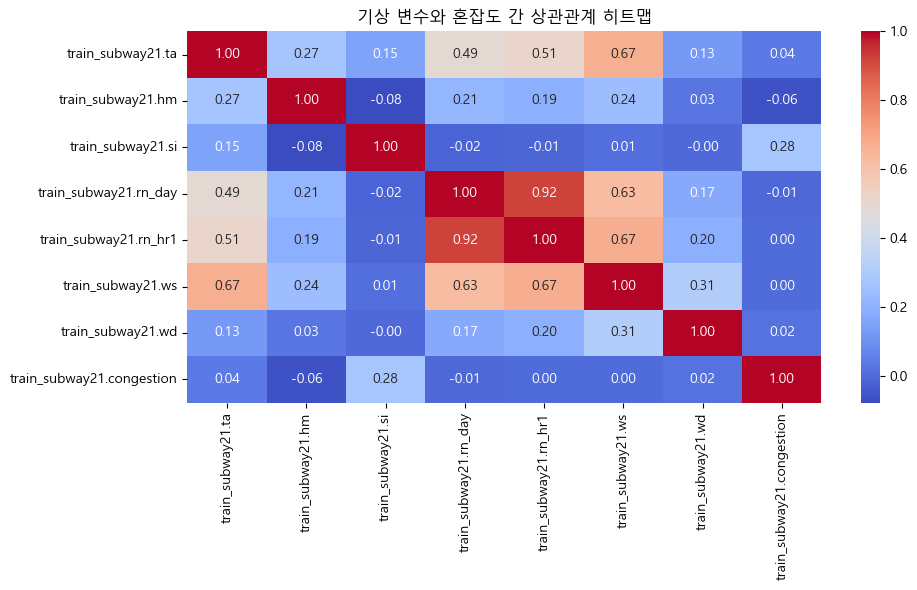

In [19]:
plt.figure(figsize=(10, 6))
corr = df[[
    'train_subway21.ta', 'train_subway21.hm', 'train_subway21.si',
    'train_subway21.rn_day', 'train_subway21.rn_hr1',
    'train_subway21.ws', 'train_subway21.wd',
    'train_subway21.congestion'
]].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('기상 변수와 혼잡도 간 상관관계 히트맵')
plt.tight_layout()
plt.show()


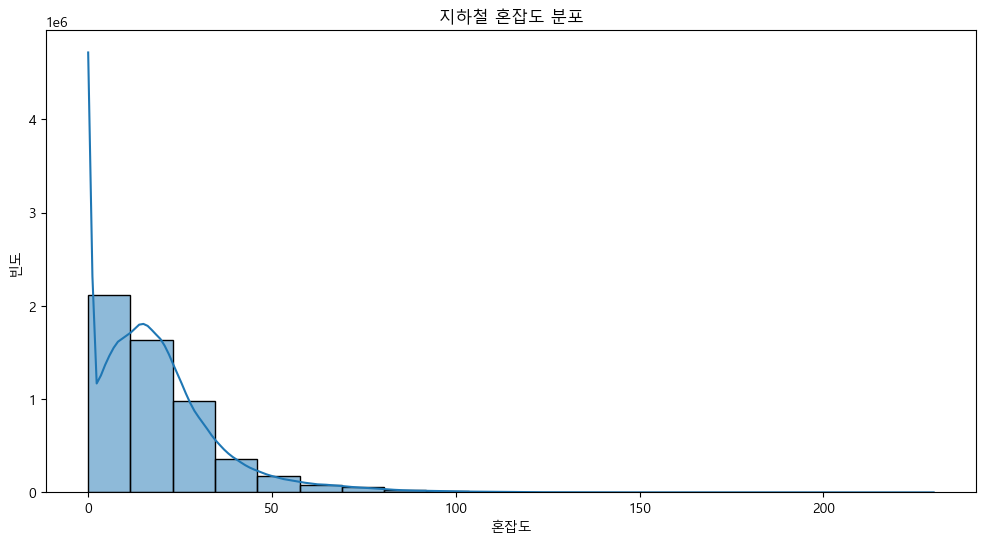

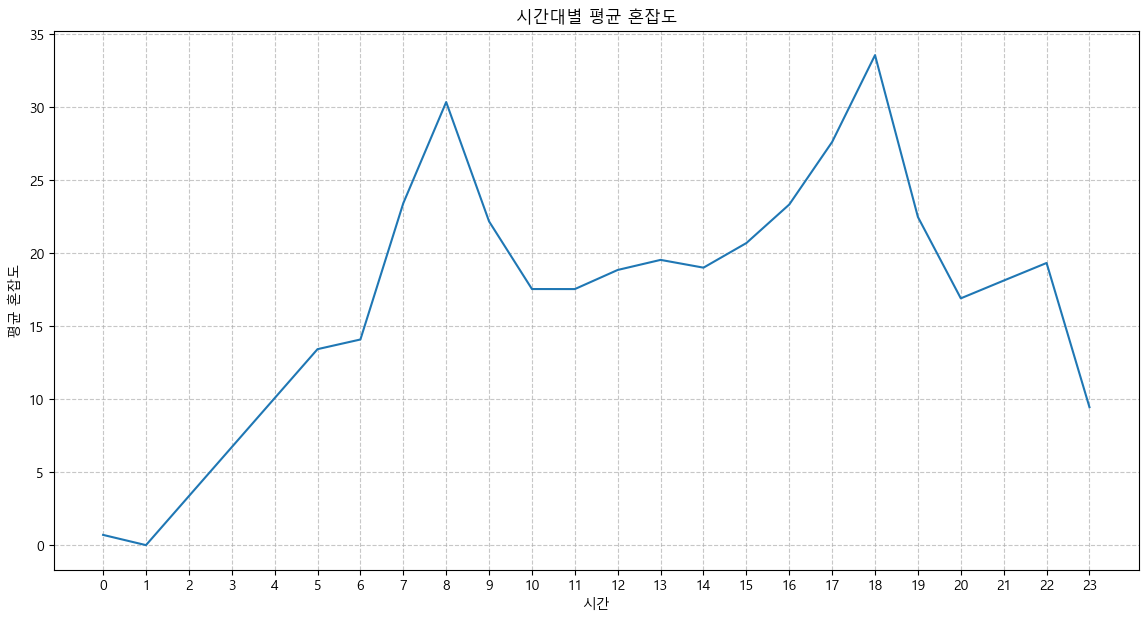

KeyError: 'Column not found: congestion'

<Figure size 1200x600 with 0 Axes>

In [ ]:

### 3. 탐색적 데이터 분석 (EDA)


# 3.1 혼잡도 분포 분석
plt.figure(figsize=(12, 6))
sns.histplot(df['train_subway21.congestion'], bins=20, kde=True)
plt.title('지하철 혼잡도 분포')
plt.xlabel('혼잡도')
plt.ylabel('빈도')
plt.show()

# 3.2 시간대별 혼잡도 패턴
plt.figure(figsize=(14, 7))
hourly_congestion = df.groupby('hour')['train_subway21.congestion'].mean()
sns.lineplot(x=hourly_congestion.index, y=hourly_congestion.values)
plt.title('시간대별 평균 혼잡도')
plt.xlabel('시간')
plt.ylabel('평균 혼잡도')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [27]:
## 이건 아직 안봐도 됨 클로드가 짜준건데 변수가 안맞음 예시임 feature에 EDA 결과로 나온 변수들 넣고 돌릴거임
### 4. 고급 분석 및 모델링


# 4.1 데이터 준비
# 예측에 사용할 특성 선택
features = ['ta', 'wd', 'ws', 'rn_hr1', 'hm', 'si', 'ta_chi', 
            'hour', 'dayofweek', 'weekend', 'season']

# 시간대 특성을 원-핫 인코딩
time_dummies = pd.get_dummies(df['time_category'], prefix='time')
df = pd.concat([df, time_dummies], axis=1)
features.extend(time_dummies.columns.tolist())

# 역 및 노선 정보도 포함 (필요시 원-핫 인코딩 또는 라벨 인코딩)
# 역이 많은 경우, 빈도수 기반으로 카테고리 축소 고려
station_counts = df['station_name'].value_counts()
top_stations = station_counts[station_counts > 100].index.tolist()  # 빈도가 100 이상인 역만 선택
df['station_group'] = df['station_name'].apply(lambda x: x if x in top_stations else 'Other')
station_dummies = pd.get_dummies(df['station_group'], prefix='station')
df = pd.concat([df, station_dummies], axis=1)
features.extend(station_dummies.columns.tolist())

# 데이터 분할 (학습/테스트)
X = df[features]
y = df['congestion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"학습 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

# 4.2 머신러닝 모델 학습 및 평가

# 선형 회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print(f"선형 회귀 - RMSE: {lr_rmse:.4f}, R²: {lr_r2:.4f}")

# 랜덤 포레스트
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f"랜덤 포레스트 - RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost - RMSE: {xgb_rmse:.4f}, R²: {xgb_r2:.4f}")

# LightGBM
lgbm_model = lgbm.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
lgbm_r2 = r2_score(y_test, lgbm_pred)
print(f"LightGBM - RMSE: {lgbm_rmse:.4f}, R²: {lgbm_r2:.4f}")

# 모델 비교
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM']
rmse_scores = [lr_rmse, rf_rmse, xgb_rmse, lgbm_rmse]
r2_scores = [lr_r2, rf_r2, xgb_r2, lgbm_r2]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=rmse_scores)
plt.title('모델별 RMSE 비교')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_scores)
plt.title('모델별 R² 비교')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4.3 특성 중요도 시각화
if hasattr(rf, 'feature_importances_'):
    plt.figure(figsize=(14, 8))
    feature_importance = pd.DataFrame({'feature': X_train.columns, 
                                    'importance': rf.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title('랜덤 포레스트 - 상위 20개 특성 중요도')
    plt.xlabel('중요도')
    plt.ylabel('특성')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.show()

# 4.4 예측 성능 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 혼잡도')
plt.ylabel('예측 혼잡도')
plt.title('랜덤 포레스트 모델 - 실제 vs 예측')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5. 특정 시나리오 분석 및 인사이트 도출


# 5.1 악천후 시 특정 노선/역의 혼잡도 변화
# 강수량이 많은 날의 역별 혼잡도 변화
rainy_days = df[df['rn_hr1'] > 5].copy()  # 강수량이 5mm 이상인 경우
normal_days = df[df['rn_hr1'] <= 5].copy()

# 역별 평균 혼잡도 계산
rainy_station_congestion = rainy_days.groupby('station_name')['congestion'].mean()
normal_station_congestion = normal_days.groupby('station_name')['congestion'].mean()

# 차이 계산
station_diff = pd.DataFrame({
    '강수 시 혼잡도': rainy_station_congestion,
    '평상시 혼잡도': normal_station_congestion
})
station_diff['차이'] = station_diff['강수 시 혼잡도'] - station_diff['평상시 혼잡도']
station_diff = station_diff.sort_values('차이', ascending=False)

# 상위 15개 역 시각화 (강수 시 혼잡도 증가가 가장 큰 역)
plt.figure(figsize=(16, 10))
top_diff_stations = station_diff.head(15)
ind = np.arange(len(top_diff_stations))
width = 0.35

plt.bar(ind - width/2, top_diff_stations['강수 시 혼잡도'], width, label='강수 시')
plt.bar(ind + width/2, top_diff_stations['평상시 혼잡도'], width, label='평상시')

plt.title('강수 시 혼잡도 증가가 가장 큰 역 (상위 15개)')
plt.xlabel('역명')
plt.ylabel('혼잡도')
plt.xticks(ind, top_diff_stations.index, rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5.2 온도와 혼잡도의 관계 상세 분석
# 온도 구간별 혼잡도
df['ta_original'] = scaler.inverse_transform(df[['ta']])[:, 0]  # 원래 온도 값으로 변환
df['temp_bin'] = pd.cut(df['ta_original'], bins=[-40, -10, 0, 10, 20, 30, 40], 
                        labels=['매우 추움', '추움', '선선함', '보통', '따뜻함', '더움'])

plt.figure(figsize=(14, 8))
sns.boxplot(x='temp_bin', y='congestion', data=df)
plt.title('온도 구간별 혼잡도 분포')
plt.xlabel('온도 구간')
plt.ylabel('혼잡도')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5.3 시간대, 날씨, 요일 조합에 따른 혼잡도 분석
# 요일별, 시간대별 평균 혼잡도 히트맵
pivot_table = df.pivot_table(values='congestion', 
                            index='hour', 
                            columns='day_name', 
                            aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('요일별, 시간대별 평균 혼잡도')
plt.xlabel('요일')
plt.ylabel('시간')
plt.tight_layout()
plt.show()

# 5.4 계절별 주요 역의 혼잡도 변화 패턴
# 상위 5개 혼잡 역 선택
top_5_stations = station_congestion.index[:5]
seasonal_station_data = df[df['station_name'].isin(top_5_stations)]

plt.figure(figsize=(15, 10))
for i, station in enumerate(top_5_stations, 1):
    station_data = seasonal_station_data[seasonal_station_data['station_name'] == station]
    seasonal_avg = station_data.groupby('season_name')['congestion'].mean()
    
    plt.subplot(2, 3, i)
    season_order = ['봄', '여름', '가을', '겨울']
    seasonal_avg = seasonal_avg.reindex(season_order)
    sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values)
    plt.title(f'{station} 역 계절별 혼잡도')
    plt.ylim(0, station_data['congestion'].max() * 1.1)
    plt.ylabel('평균 혼잡도')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 5.5 혼잡도에 영향을 미치는 복합적인 요인 분석
# 날씨(강수, 온도), 시간대, 요일 조합의 영향력 분석
df['is_rainy'] = df['rn_hr1'].apply(lambda x: 1 if x > 0 else 0)
df['temp_group'] = pd.cut(df['ta_original'], bins=[-40, 0, 15, 40], labels=['추움', '적정', '더움'])

# 복합 특성 생성
df['weather_time_combo'] = df['temp_group'].astype(str) + '_' + df['is_rainy'].astype(str) + '_' + df['time_category'].astype(str)

plt.figure(figsize=(18, 10))
combo_counts = df['weather_time_combo'].value_counts()
top_combos = combo_counts[combo_counts > 1000].index.tolist()  # 충분한 데이터가 있는 조합만
combo_congestion = df[df['weather_time_combo'].isin(top_combos)].groupby('weather_time_combo')['congestion'].mean().sort_values(ascending=False)

sns.barplot(x=combo_congestion.index, y=combo_congestion.values)
plt.title('날씨-시간대 조합별 평균 혼잡도')
plt.xlabel('날씨-강수-시간대 조합')
plt.ylabel('평균 혼잡도')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6. 예측 모델 고도화


# 6.1 모델 하이퍼파라미터 최적화
from sklearn.model_selection import GridSearchCV

# 가장 성능이 좋은 모델 선택 (예: XGBoost)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
print(f"최적 RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

# 최적화된 모델로 예측
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_pred))
best_r2 = r2_score(y_test, best_pred)
print(f"테스트 데이터 RMSE: {best_rmse:.4f}, R²: {best_r2:.4f}")

# 6.2 시계열 특성 강화
# 이전 시간대 혼잡도를 특성으로 추가
time_series_df = df.sort_values(['station_name', 'datetime'])
for i in [1, 2, 3]:  # 1시간 전, 2시간 전, 3시간 전 데이터
    time_series_df[f'congestion_lag_{i}'] = time_series_df.groupby('station_name')['congestion'].shift(i)

# 요일 및 시간대별 평균 혼잡도 특성 추가
hour_day_mean = df.groupby(['hour', 'dayofweek'])['congestion'].mean().reset_index()
time_series_df = pd.merge(
    time_series_df, 
    hour_day_mean, 
    on=['hour', 'dayofweek'], 
    suffixes=('', '_hour_day_avg')
)

# 결측치 제거 (첫 몇 시간은 lag 값이 없음)
time_series_df = time_series_df.dropna(subset=['congestion_lag_1', 'congestion_lag_2', 'congestion_lag_3'])

# 개선된 특성으로 데이터셋 재구성
enhanced_features = features + ['congestion_lag_1', 'congestion_lag_2', 'congestion_lag_3', 'congestion_hour_day_avg']
X_ts = time_series_df[enhanced_features]
y_ts = time_series_df['congestion']

# 학습/테스트 분할 (시계열 데이터이므로 시간순으로 분할)
split_idx = int(len(X_ts) * 0.8)
X_train_ts, X_test_ts = X_ts[:split_idx], X_ts[split_idx:]
y_train_ts, y_test_ts = y_ts[:split_idx], y_ts[split_idx:]

print(f"시계열 특성 강화 - 학습 데이터 크기: {X_train_ts.shape}")
print(f"시계열 특성 강화 - 테스트 데이터 크기: {X_test_ts.shape}")

# 개선된 모델 학습
ts_model = xgb.XGBRegressor(**grid_search.best_params_, random_state=42)
ts_model.fit(X_train_ts, y_train_ts)
ts_pred = ts_model.predict(X_test_ts)
ts_rmse = np.sqrt(mean_squared_error(y_te0))
print(f"시계열 특성 강화 모델 - RMSE: {ts_rmse:.4f}, R²: {ts_r2:.4f}")

# 모델 비교
plt.figure(figsize=(10, 6))
models = ['기본 모델', '최적화 모델', '시계열 강화 모델']
rmse_scores = [xgb_rmse, best_rmse, ts_rmse]
r2_scores = [xgb_r2, best_r2, ts_r2]

plt.subplot(1, 2, 1)
sns.barplot(x=models, y=rmse_scores)
plt.title('모델별 RMSE 비교')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_scores)
plt.title('모델별 R² 비교')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

### 7. 특정 역과 시나리오 심층 분석


# 7.1 주요 역 선택 및 심층 분석
target_station = '서울역'  # 혼잡도가 높은 주요 역
station_data = df[df['station_name'] == target_station].copy()

plt.figure(figsize=(15, 10))

# 시간대별 혼잡도
plt.subplot(2, 2, 1)
hourly_station = station_data.groupby('hour')['congestion'].mean()
sns.lineplot(x=hourly_station.index, y=hourly_station.values)
plt.title(f'{target_station} 시간대별 평균 혼잡도')
plt.xlabel('시간')
plt.ylabel('평균 혼잡도')
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.7)

# 요일별 혼잡도
plt.subplot(2, 2, 2)
daily_station = station_data.groupby('day_name')['congestion'].mean().reindex(day_order)
sns.barplot(x=daily_station.index, y=daily_station.values)
plt.title(f'{target_station} 요일별 평균 혼잡도')
plt.xlabel('요일')
plt.ylabel('평균 혼잡도')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 날씨와 혼잡도의 관계
plt.subplot(2, 2, 3)
sns.scatterplot(x='ta', y='congestion', hue='is_rainy', data=station_data)
plt.title(f'{target_station} 온도와 혼잡도의 관계')
plt.xlabel('온도 (정규화)')
plt.ylabel('혼잡도')
plt.legend(['맑음', '비'])
plt.grid(True, linestyle='--', alpha=0.7)

# 시간대별, 계절별 혼잡도
plt.subplot(2, 2, 4)
pivot_seasonal = station_data.pivot_table(
    values='congestion', 
    index='hour', 
    columns='season_name', 
    aggfunc='mean'
).reindex(columns=season_order)
sns.heatmap(pivot_seasonal, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title(f'{target_station} 시간대별, 계절별 평균 혼잡도')
plt.xlabel('계절')
plt.ylabel('시간')

plt.tight_layout()
plt.show()

# 7.2 특정 시나리오 분석 (예: 비오는 출근 시간)
rainy_rush_hour = station_data[
    (station_data['time_category'] == '출근') & 
    (station_data['is_rainy'] == 1)
]
normal_rush_hour = station_data[
    (station_data['time_category'] == '출근') & 
    (station_data['is_rainy'] == 0)
]

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.kdeplot(rainy_rush_hour['congestion'], label='비오는 날', shade=True)
sns.kdeplot(normal_rush_hour['congestion'], label='맑은 날', shade=True)
plt.title(f'{target_station} 출근 시간대 날씨별 혼잡도 분포')
plt.xlabel('혼잡도')
plt.ylabel('밀도')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
rainy_mean = rainy_rush_hour['congestion'].mean()
normal_mean = normal_rush_hour['congestion'].mean()
sns.barplot(x=['비오는 날', '맑은 날'], y=[rainy_mean, normal_mean])
plt.title(f'{target_station} 출근 시간대 날씨별 평균 혼잡도')
plt.xlabel('날씨')
plt.ylabel('평균 혼잡도')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 8. 실용적인 인사이트 및 결론 도출


# 8.1 가장 혼잡한 조건 조합 도출
conditions = ['station_name', 'hour', 'dayofweek', 'is_rainy', 'temp_group']
congestion_by_conditions = df.groupby(conditions)['congestion'].mean().reset_index()
congestion_by_conditions = congestion_by_conditions.sort_values('congestion', ascending=False)

print("가장 혼잡한 상위 10개 조건 조합:")
for i, row in congestion_by_conditions.head(10).iterrows():
    print(f"역: {row['station_name']}, 시간: {row['hour']}시, " + 
          f"요일: {day_mapping[row['dayofweek']]}, 비: {'O' if row['is_rainy'] == 1 else 'X'}, " +
          f"온도: {row['temp_group']}, 혼잡도: {row['congestion']:.2f}")

# 8.2 조건별 혼잡도 증가율 계산
# 기준 혼잡도 (전체 평균)
baseline_congestion = df['congestion'].mean()

# 여러 조건에 따른 혼잡도 변화율
condition_effects = []

# 시간대 영향
for hour in range(24):
    hour_cong = df[df['hour'] == hour]['congestion'].mean()
    condition_effects.append({
        '조건': f'{hour}시',
        '평균 혼잡도': hour_cong,
        '변화율(%)': (hour_cong / baseline_congestion - 1) * 100
    })

# 요일 영향
for day in range(7):
    day_cong = df[df['dayofweek'] == day]['congestion'].mean()
    condition_effects.append({
        '조건': day_mapping[day],
        '평균 혼잡도': day_cong,
        '변화율(%)': (day_cong / baseline_congestion - 1) * 100
    })

# 날씨 영향
rainy_cong = df[df['is_rainy'] == 1]['congestion'].mean()
condition_effects.append({
    '조건': '비/눈',
    '평균 혼잡도': rainy_cong,
    '변화율(%)': (rainy_cong / baseline_congestion - 1) * 100
})

# 온도 영향
for temp in ['추움', '적정', '더움']:
    temp_cong = df[df['temp_group'] == temp]['congestion'].mean()
    condition_effects.append({
        '조건': temp,
        '평균 혼잡도': temp_cong,
        '변화율(%)': (temp_cong / baseline_congestion - 1) * 100
    })

# 결과를 데이터프레임으로 변환하여 시각화
effect_df = pd.DataFrame(condition_effects)
effect_df = effect_df.sort_values('변화율(%)', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='조건', y='변화율(%)', data=effect_df.head(15))
plt.title('혼잡도 증가에 가장 큰 영향을 미치는 상위 15개 조건')
plt.xlabel('조건')
plt.ylabel('기준 대비 변화율(%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 8.3 날씨 변화에 따른 역별 혼잡도 민감도 분석
# 비가 올 때와 안 올 때의 혼잡도 차이를 역별로 계산
station_sensitivity = df.groupby(['station_name', 'is_rainy'])['congestion'].mean().unstack()
station_sensitivity.columns = ['맑음', '비']
station_sensitivity['변화량'] = station_sensitivity['비'] - station_sensitivity['맑음']
station_sensitivity['변화율(%)'] = (station_sensitivity['변화량'] / station_sensitivity['맑음']) * 100
station_sensitivity = station_sensitivity.sort_values('변화율(%)', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=station_sensitivity.head(15).index, y=station_sensitivity.head(15)['변화율(%)'])
plt.title('비 오는 날 혼잡도 증가율이 높은 상위 15개 역')
plt.xlabel('역명')
plt.ylabel('혼잡도 변화율(%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 9. 실용적인 대시보드 및 시각화


# 9.1 인터랙티브 대시보드 (주피터 노트북에서 실행 가능한 형태)
import ipywidgets as widgets
from IPython.display import display

# 특정 역과 시간대를 선택하여 혼잡도를 확인할 수 있는 위젯
station_options = sorted(df['station_name'].unique())
hour_options = list(range(24))
day_options = day_mapping.values()

# 위젯 생성
station_widget = widgets.Dropdown(options=station_options, description='역:')
hour_widget = widgets.Dropdown(options=hour_options, description='시간:')
day_widget = widgets.Dropdown(options=day_options, description='요일:')
weather_widget = widgets.Dropdown(options=['전체', '맑음', '비'], description='날씨:')

# 결과 표시 위젯
output = widgets.Output()

# 위젯 조작 시 실행될 함수
def on_change(change):
    with output:
        output.clear_output()
        station = station_widget.value
        hour = hour_widget.value
        day = list(day_mapping.keys())[list(day_mapping.values()).index(day_widget.value)]
        weather = weather_widget.value
        
        filtered_data = df[(df['station_name'] == station) & 
                          (df['hour'] == hour) & 
                          (df['dayofweek'] == day)]
        
        if weather != '전체':
            is_rainy = 1 if weather == '비' else 0
            filtered_data = filtered_data[filtered_data['is_rainy'] == is_rainy]
        
        avg_congestion = filtered_data['congestion'].mean()
        max_congestion = filtered_data['congestion'].max()
        
        print(f"선택 조건: {station} 역, {hour}시, {day_widget.value}, {weather}")
        print(f"평균 혼잡도: {avg_congestion:.2f}")
        print(f"최대 혼잡도: {max_congestion:.2f}")
        
        if len(filtered_data) > 0:
            plt.figure(figsize=(10, 6))
            sns.histplot(filtered_data['congestion'], bins=15, kde=True)
            plt.title(f"{station} 역 {hour}시 {day_widget.value} {weather} 혼잡도 분포")
            plt.xlabel('혼잡도')
            plt.ylabel('빈도')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.show()
        else:
            print("해당 조건의 데이터가 없습니다.")

# 위젯 변경 시 함수 호출
station_widget.observe(on_change, names='value')
hour_widget.observe(on_change, names='value')
day_widget.observe(on_change, names='value')
weather_widget.observe(on_change, names='value')

# 위젯 배치
controls = widgets.HBox([station_widget, hour_widget, day_widget, weather_widget])
dashboard = widgets.VBox([controls, output])
display(dashboard)

# 9.2 주요 발견점 요약 시각화
# 날씨와 혼잡도 관계 요약
plt.figure(figsize=(18, 12))

# 1. 시간대별 날씨 영향
plt.subplot(2, 2, 1)
time_weather = df.pivot_table(
    values='congestion', 
    index='hour', 
    columns='is_rainy', 
    aggfunc='mean'
)
time_weather.columns = ['맑음', '비']
time_weather.plot(kind='line', marker='o')
plt.title('시간대별 날씨에 따른 평균 혼잡도')
plt.xlabel('시간')
plt.ylabel('평균 혼잡도')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 2. 요일별 날씨 영향
plt.subplot(2, 2, 2)
day_weather = df.pivot_table(
    values='congestion', 
    index='day_name', 
    columns='is_rainy', 
    aggfunc='mean'
).reindex(day_order)
day_weather.columns = ['맑음', '비']
day_weather.plot(kind='bar')
plt.title('요일별 날씨에 따른 평균 혼잡도')
plt.xlabel('요일')
plt.ylabel('평균 혼잡도')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

# 3. 온도와 혼잡도 관계
plt.subplot(2, 2, 3)
temp_data = df.groupby('temp_group')['congestion'].mean().reindex(['추움', '적정', '더움'])
sns.barplot(x=temp_data.index, y=temp_data.values)
plt.title('온도 구간별 평균 혼잡도')
plt.xlabel('온도 구간')
plt.ylabel('평균 혼잡도')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 4. 계절별 혼잡도
plt.subplot(2, 2, 4)
season_data = df.groupby('season_name')['congestion'].mean().reindex(season_order)
sns.barplot(x=season_data.index, y=season_data.values)
plt.title('계절별 평균 혼잡도')
plt.xlabel('계절')
plt.ylabel('평균 혼잡도')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 10. 결론 및 시사점


# 10.1 주요 발견점 정리
# 각 분석을 통해 발견한 주요 인사이트 및 패턴 요약

# 날씨와 혼잡도의 관계
weather_impact = pd.DataFrame({
    '날씨 조건': ['강수 유무', '온도 변화 (10°C 당)', '계절 (여름 vs 겨울)'],
    '혼잡도 변화': [
        (df[df['is_rainy'] == 1]['congestion'].mean() - df[df['is_rainy'] == 0]['congestion'].mean()),
        # 온도와 혼잡도 간의 관계를 선형 회귀로 추정
        LinearRegression().fit(df[['ta']], df['congestion']).coef_[0] * 10,
        df[df['season'] == 2]['congestion'].mean() - df[df['season'] == 4]['congestion'].mean()
    ],
    '변화율(%)': [
        ((df[df['is_rainy'] == 1]['congestion'].mean() / df[df['is_rainy'] == 0]['congestion'].mean()) - 1) * 100,
        ((LinearRegression().fit(df[['ta']], df['congestion']).coef_[0] * 10) / df['congestion'].mean()) * 100,
        ((df[df['season'] == 2]['congestion'].mean() / df[df['season'] == 4]['congestion'].mean()) - 1) * 100
    ]
})

print("날씨가 지하철 혼잡도에 미치는 영향:")
print(weather_impact)

# 시간대별 주요 패턴
time_patterns = pd.DataFrame({
    '시간대': ['출근 시간 (7-9시)', '퇴근 시간 (17-19시)', '한밤중 (0-5시)'],
    '평균 혼잡도': [
        df[(df['hour'] >= 7) & (df['hour'] <= 9)]['congestion'].mean(),
        df[(df['hour'] >= 17) & (df['hour'] <= 19)]['congestion'].mean(),
        df[(df['hour'] >= 0) & (df['hour'] <= 5)]['congestion'].mean()
    ],
    '기준 대비 변화율(%)': [
        ((df[(df['hour'] >= 7) & (df['hour'] <= 9)]['congestion'].mean() / df['congestion'].mean()) - 1) * 100,
        ((df[(df['hour'] >= 17) & (df['hour'] <= 19)]['congestion'].mean() / df['congestion'].mean()) - 1) * 100,
        ((df[(df['hour'] >= 0) & (df['hour'] <= 5)]['congestion'].mean() / df['congestion'].mean()) - 1) * 100
    ]
})

print("\n시간대별 혼잡도 패턴:")
print(time_patterns)

# 요일별 패턴
day_patterns = pd.DataFrame({
    '요일': list(day_mapping.values()),
    '평균 혼잡도': [df[df['dayofweek'] == day]['congestion'].mean() for day in range(7)],
    '기준 대비 변화율(%)': [
        ((df[df['dayofweek'] == day]['congestion'].mean() / df['congestion'].mean()) - 1) * 100 
        for day in range(7)
    ]
})

print("\n요일별 혼잡도 패턴:")
print(day_patterns)

# 10.2 최종 모델 성능 요약
model_summary = pd.DataFrame({
    '모델': ['선형 회귀', '랜덤 포레스트', 'XGBoost', 'LightGBM', '최적화 XGBoost', '시계열 강화 XGBoost'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse, lgbm_rmse, best_rmse, ts_rmse],
    'R²': [lr_r2, rf_r2, xgb_r2, lgbm_r2, best_r2, ts_r2]
})

print("\n모델 성능 비교:")
print(model_summary)

# 10.3 정책적 시사점 및 활용 방안
print("\n정책적 시사점 및 활용 방안:")
print("1. 날씨 예보에 따른 역별 혼잡도 예측 서비스 제공")
print("2. 우천 시 혼잡도가 크게 증가하는 구간에 열차 증편 또는 대체 교통 수단 강화")
print("3. 계절별 혼잡도 변화를 고려한 교통 정책 수립")
print("4. 날씨 변화에 민감한 역의 시설 개선 (우천 시 대기 공간 확대 등)")
print("5. 출퇴근 시간대와 악천후가 겹칠 경우를 대비한 특별 교통 대책 마련")

# 10.4 분석 한계점 및 향후 연구 방향
print("\n분석 한계점 및 향후 연구 방향:")
print("1. 코로나19 이후 통행량 변화를 고려한 분석 필요")
print("2. 특정 이벤트(축제, 공연 등)에 따른 혼잡도 변화 추가 분석")
print("3. 미세먼지, 황사 등 대기 질 요소와 혼잡도의 관계 분석")
print("4. 열차 운행 간격, 지연 정보 등 운행 데이터와의 결합 분석")
print("5. 역 주변 시설(쇼핑몰, 회사 밀집 지역 등)과 혼잡도 관계 분석")

## 분석 결과 요약 및 활용 방안
'''
이 분석을 통해 날씨가 지하철 혼잡도에 미치는 영향을 다각도로 파악하였습니다. 주요 발견점은 다음과 같습니다:

1. 강수 여부는 혼잡도에 상당한 영향을 미치며, 특히 출퇴근 시간대에 그 영향이
'''

KeyError: 'station_name'